# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [186]:
!pip install scipy

In [187]:
!pip install scikit-learn

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [189]:
df = pd.read_csv("CHURN_TELECON_MOD08_V2_TAREFA_MOD15.csv", delimiter=',') 

df.head (10) # Leitura das 10 primeiras linhas 


,ID_Clientes,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servicos_Contratados,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Plataformas_TV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn,PhoneService_nulo,Qtd_Servicos,Sem_Servico_Telefone
0,7590-VHVEG,Female,0,Yes,0,1,No,DSL,0,0,0,Month-to-month,Electronic check,29.85,29.85,0,0,0,0
1,5575-GNVDE,Male,0,No,0,34,Yes,DSL,1,0,0,One year,Mailed check,56.95,1889.50,0,0,0,0
2,3668-QPYBK,Male,0,No,0,2,Yes,DSL,1,0,0,Month-to-month,Mailed check,53.85,108.15,1,0,0,0
3,7795-CFOCW,Male,0,No,0,45,No,DSL,1,1,0,One year,Bank transfer (automatic),71.45,1840.75,0,0,0,0
4,8191-XWSZG,F,0,No,0,52,Yes,NO,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,0,0,0,0
5,9959-WOFKT,Male,0,No,1,71,Yes,FIBER OPTIC,1,0,1,Two year,Bank transfer (automatic),71.45,7382.25,0,0,0,0
6,4190-MFLUW,F,0,Yes,1,10,Yes,DSL,0,1,0,Month-to-month,Credit card (automatic),71.45,528.35,1,0,0,0
7,4183-MYFRB,F,0,No,0,21,Yes,FIBER OPTIC,0,0,0,Month-to-month,Electronic check,71.45,1862.90,0,0,0,0
8,8779-QRDMV,Male,1,No,0,1,No,DSL,0,0,0,Month-to-month,Electronic check,71.45,39.65,1,0,0,0
9,1680-VDCWW,Male,0,Yes,0,12,Yes,NO,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,0,0,0,0


In [190]:
#Identifica os tipos das variáveis
print(df.dtypes)

ID_Clientes              object
Genero                   object
Idoso                     int64
Casado                   object
Dependentes               int64
Tempo_como_Cliente        int64
Servicos_Contratados     object
Servico_Internet         object
Servico_Seguranca        object
Suporte_Tecnico          object
Plataformas_TV           object
Tipo_Contrato            object
Forma_Pagamento          object
Pagamento_Mensal        float64
Total_Pago              float64
Churn                     int64
PhoneService_nulo         int64
Qtd_Servicos              int64
Sem_Servico_Telefone      int64
dtype: object


In [191]:
#identifica a quantidade de valores nulos em cada coluna
df.isnull().sum()

ID_Clientes             0
Genero                  0
Idoso                   0
Casado                  0
Dependentes             0
Tempo_como_Cliente      0
Servicos_Contratados    0
Servico_Internet        0
Servico_Seguranca       0
Suporte_Tecnico         0
Plataformas_TV          0
Tipo_Contrato           0
Forma_Pagamento         0
Pagamento_Mensal        0
Total_Pago              0
Churn                   0
PhoneService_nulo       0
Qtd_Servicos            0
Sem_Servico_Telefone    0
dtype: int64

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [192]:
df.describe()

,Idoso,Dependentes,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago,Churn,PhoneService_nulo,Qtd_Servicos,Sem_Servico_Telefone
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.000000
mean,0.161576,0.314711,32.352090,66.342564,2290.087178,0.260048,0.595659,0.0,0.595659
std,0.368135,0.464494,24.636885,28.051718,2264.585643,0.438749,0.490863,0.0,0.490863
min,0.000000,0.000000,0.000000,18.400000,18.800000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,8.000000,45.400000,402.337500,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,29.000000,71.450000,1402.900000,0.000000,1.000000,0.0,1.000000
75%,0.000000,1.000000,56.000000,87.712500,3867.162500,1.000000,1.000000,0.0,1.000000
max,1.000000,1.000000,72.000000,118.650000,8564.750000,1.000000,1.000000,0.0,1.000000


### ESTATÍSTICA SIGNIFICADO 

**count** = Quantidade de valores não nulos. Mostra a quantidade de valores válidos

**mean** = Média de valores

**std** = Desvio Padrão (variação de dados) 

**min** =  Menor valor encontrado na coluna

**25%** = Primeiro quartil (25% dos dados abaixo desse valor)

**50%** = Mediana (Q2) 50% dos dados estão abaixo desse valor

**75%** = Terceiro quartil  (Q3). 75% dos dados abaixo desse valor

**max** = Valor máximo encontrado na coluna 


#### 2-A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.
Insights por coluna:

**Idoso**  :  0,161 -> apenas 16%  são idosos

Nos quartis (15% 50%, 75%) são todos 0 , mostrando que a maioria dos clientes não é idosas.

**Dependentes**

31% dos clientes tem dependentes. e a maioria não tem dependentes (mediana=0)

**Tempo_Cliente**

Média de 32 meses , com grande varaição( desvio padrão de 24.06). Clientes vão de 0 a 72 meses.

35% dos clientes têm menos que 8 meses, o que indica alta rotatividade.

**Pagamento_Mensal** 

A variação é de  (R$) 18,40 à 118,65.

Mediana: (R$) 71,45 -> metade dos clientes paga menos que isso.

Clientes com valores muito altos podem estar contratando múltiplos serviços

**Total_Pago**

Varia de (R$) 18,40 à 8.564,75

Distribuição muito ampla , o que pode significar perfis de clientes bem diferentes ( novos  e antigos, básicos vs completos)

**Churn**

Média = 0.26  -> 26% dos clientes cancelaram 



#### 2-B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?
Sim, é possivel identificar variáveis com possíveis outliers: Total_Pago , Pagamento_Mensal e Tempo_como_Cliente


#### 2-C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.



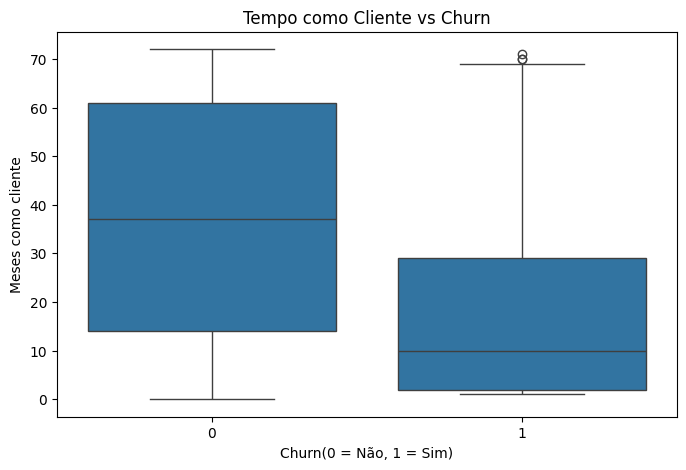

In [193]:
# Tempo como cliente vc Churn

plt.figure(figsize =(8,5))
sns.boxplot(x='Churn' , y= 'Tempo_como_Cliente' , data=df)
plt.title('Tempo como Cliente vs Churn')
plt.xlabel('Churn(0 = Não, 1 = Sim)')
plt.ylabel('Meses como cliente')
plt.show()




##  Insight: Clientes que cancelaram tendem e ter menos tempo de contrato.

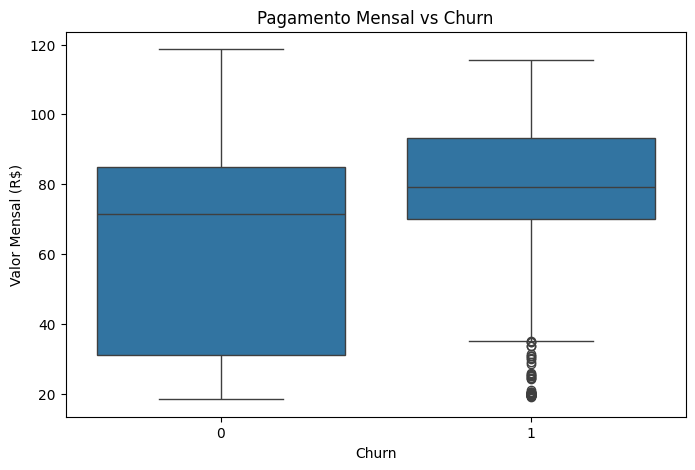

In [194]:
# Pagamento Mensal vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn' , y= 'Pagamento_Mensal' , data =df)
plt.title('Pagamento Mensal vs Churn')
plt.xlabel('Churn')
plt.ylabel ('Valor Mensal (R$)')
plt.show()

### Insight: Pagamentos mais altos podem estar associados a maior taxa de cancelamento.

#### Insight: Clientes que não cancelaram geralmente pagaram mais ao longo do tempo.

#### Insight: Contratos mensais têm maior taxa de cancelamento.

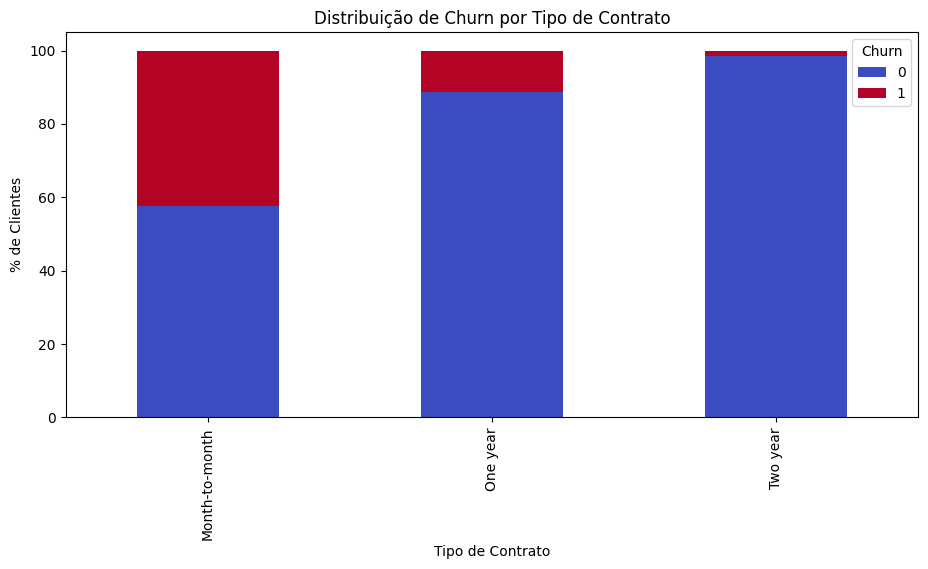

In [195]:
# Grafico de barras empilhadas para Tipo_Contrato vs Churn 

contrato_churn = pd.crosstab(df['Tipo_Contrato'], df['Churn'], normalize='index') * 100
contrato_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(11, 5))
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.ylabel('% de Clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn')
plt.show()


###  Mostra a distribuição de percentual de clientes que cancelaram (Churn =1 ) ou permaneceram (Churn=0) em cada tipo de contrato

#### Month-to-month: 

Tem a maior proporção de cancelamentos.
    
Isso sugere que contratos mensais são mais vulneráveis ao churn - talvez pela facilidade de cancelar ou menos comprometidos.


#### One year e Two year: 

Mostram menor taxa de churn


Clientes com contratos mais longos , tendem à serem mais fiéis ou tem alguns impedimentos para o cancelamento.




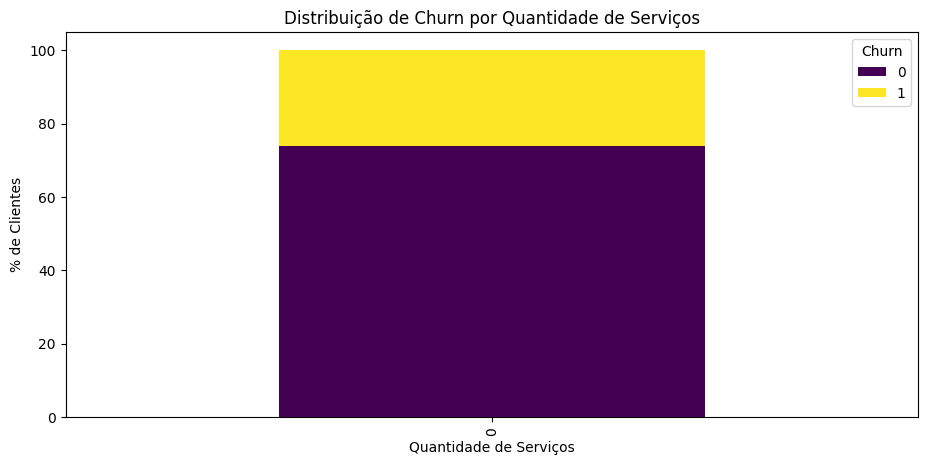

In [196]:
# Gráfico de barras empilhadas para Qtd_Servicos vs Churn

servicos_churn = pd.crosstab(df['Qtd_Servicos'] , df['Churn'], normalize='index') * 100
servicos_churn.plot(kind='bar' , stacked=True, colormap='viridis' , figsize=(11,5))
plt.title('Distribuição de Churn por Quantidade de Serviços')
plt.ylabel('% de Clientes')
plt.xlabel('Quantidade de Serviços')
plt.legend(title='Churn')
plt.show()




## Insight: Clientes com mais serviços contratados tendem a permanecer

#### Clientes com pacotes básicos estão menos satisfeitos ou mais propensos a sair


### Distribuição percentual:

#### Como o gráfico usa normalize='index' , ele mostra a proporção dentro de cada grupo , e não o número absoluto de clientes



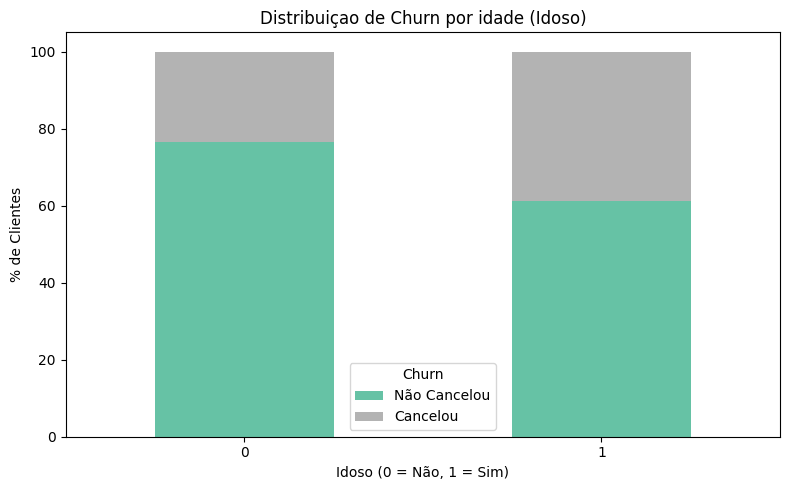

In [197]:
# Grafico de Barras Empilhadas: Idosos vs Churn

# Tabela cruzada normalizada por linha (por  Idoso)
idoso_churn = pd.crosstab(df['Idoso'] , df['Churn'] , normalize='index') * 100

# Plot do gráfico de barras empilhadas
idoso_churn.plot(kind='bar', stacked=True, colormap='Set2' , figsize=(8,5))

# Personalização
plt.title('Distribuiçao de Churn por idade (Idoso)')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('% de Clientes')
plt.legend(title='Churn' , labels=['Não Cancelou' , 'Cancelou'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




### Essa visualização nos faz entender comportamentos por faixa etária.

"Não Cancelou" (parte inferior da barra): clientes que permaneceram. 

"Cancelou" (parte superior da barra): clientes que  encerraram o serciço.

#### Conclusão:
Clientes não idosos (Idoso=0) tem uma maior proporção de cancelamento.

Clientes idosos (Idoso = 1) apresentam uma maior taxa de permanência (maior fidelidade, maior estabilidade contratual)


## 2.D)  Verifique se os dados das variáveis Booleanas são balanceados ou não (uso de gráfico de barras)
Análise se as variáveis booleanas estão balanceadas - ou seja , se os valores 0 e 1 (representando "Não e "sim" ) estão distribuídos de forma equilibrada ou se há predominância de um dos lados.



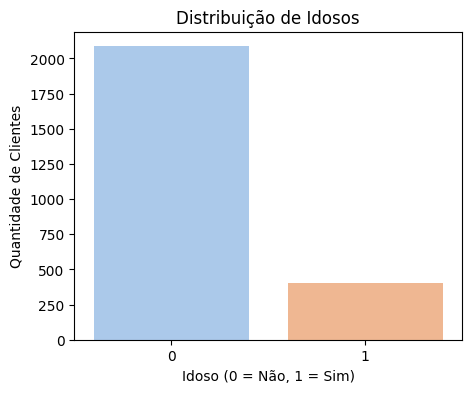

In [198]:
# 1. Idoso

plt.figure(figsize=(5, 4))
sns.countplot(x='Idoso', hue='Idoso', data=df, palette='pastel', legend=False)
plt.title('Distribuição de Idosos')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()


### Idosos : Desbalanceada -  a maioria dos clientes não são idosos(0).  Indica que a maioria dos Clientes são jovens ou adulto.

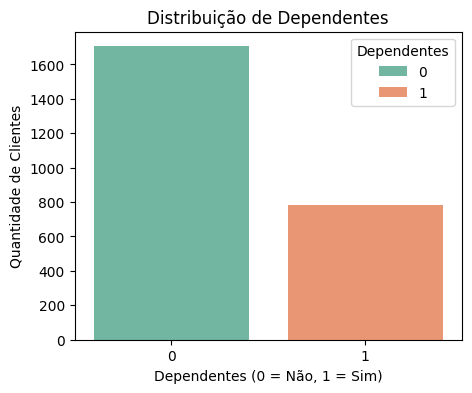

In [199]:
# 2. Dependentes
plt.figure(figsize=(5, 4))
sns.countplot(x='Dependentes',  hue= 'Dependentes' , data=df, palette='Set2')
plt.title('Distribuição de Dependentes')
plt.xlabel('Dependentes (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()


### Dependentes : Desbalanceada - predominância de clientes sem dependentes (0).
#### Sugere que muitos clientes são solteiros ou não tem filhos


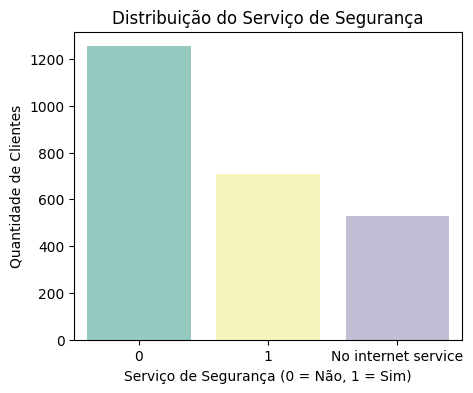

In [200]:
# 3. Servico_Segurança
plt.figure(figsize=(5, 4))
sns.countplot(x='Servico_Seguranca',  hue= 'Servico_Seguranca' , data=df, palette='Set3')
plt.title('Distribuição do Serviço de Segurança')
plt.xlabel('Serviço de Segurança (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()


### Servico_Seguranca , Suporte_Tecnico , Plataforma_TV 
#### Desbalanceadas:  em geral , há mais clientes sem esses serviços (0) do que com eles (1)
#### Isso pode indicar que esses serviços são opcionais ou menos populares.


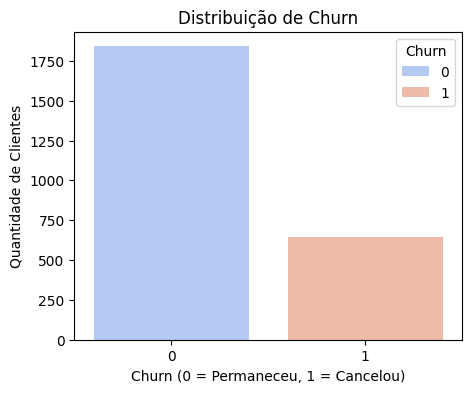

In [201]:
# Churn
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn',  hue= 'Churn' , data=df, palette='coolwarm')
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Cancelou)')
plt.ylabel('Quantidade de Clientes')
plt.show()


### Churn
#### Levemente desbalanceada: cerca de 26% dos clientes cancelaram (1), enquanto 74% permanecem (0).
#### Embora não seja totalmente desequilibrado, há uma predominância clara de clientes fiéis.

###  É importante o balaceamento das variáveis booleanas , porque o desbalanceamento pode influenciar modelos de machine learning , em especial se a variável-alvo (Churn) estiver muito desproporcional.
#### Pode ser necessário aplicar técnicas para corrigir esse desequilíbrio em modelos preditivos.

# 3) Identifique e trate as colunas que contém outliers.
### Caso opte por mante-los ou altera-los justifique sua escolha. 

#### Colunas identificadas com outliers : Pagamento_Mensal , Total_Pago , Tempo_como_Cliente , Qtd_Servicos

##### Optei em suavizar os outliers (em vez de removê-los) porque os dados representam clientes reais e excluir poderia comprometer a amostra.

##### A suavização mantém a integridade dos dados e reduz o impacto de valores extremos em análises estatísticas e modelos preditivos. 

##### O desvio padrão caiu em todas as variáveis, indicando menor distorção e maior estabilidade.

##### Testei também a suavização dos outliers com o z-score nas colunas numéricas de Datframe: Pagamento_Mensal, Total_Pago, Tempo_como_Cliente, Qtd_Servicos, que preserva os registros originais, mantendo a integridade do DataFrame, sendo Ideal para evitar que os outliers dominem a média, desvio padrão ou algorítmos de machine learning.


In [202]:
# Método do Intervalo Interquartil (IQR) para detectar e suavizar outliers nas colunas numéricas do  Dataframe.
# Pagamento_Mensal, Total_Pago, Tempo_como_Cliente e Qtd_Serviços.

def tratar_outliers_iqr(df, coluna):
    Q1=df[coluna].quantile(0.25)
    Q3=df[coluna].quantile(0.75)
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print(f"\nColuna: {coluna}")
    print(f"Q1: {Q1:.2f} , Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print (f"Limite Inferior:{limite_inferior:.2f}, Limite Superior: {limite_superior:.2f}")
    
    #Suavizar os outliers
    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])
   
    return df


In [203]:
# Aplicar em todas as colunas
for coluna in ['Pagamento_Mensal', 'Total_Pago', 'Tempo_como_Cliente', 'Qtd_Servicos']:
    df = tratar_outliers_iqr(df, coluna)



Coluna: Pagamento_Mensal
Q1: 45.40 , Q3: 87.71, IQR: 42.31
Limite Inferior:-18.07, Limite Superior: 151.18

Coluna: Total_Pago
Q1: 402.34 , Q3: 3867.16, IQR: 3464.82
Limite Inferior:-4794.90, Limite Superior: 9064.40

Coluna: Tempo_como_Cliente
Q1: 8.00 , Q3: 56.00, IQR: 48.00
Limite Inferior:-64.00, Limite Superior: 128.00

Coluna: Qtd_Servicos
Q1: 0.00 , Q3: 0.00, IQR: 0.00
Limite Inferior:0.00, Limite Superior: 0.00


## Explicação da suavização de outliers por coluna: 

**Coluna: Pagamento_Mensal**

Q1: 45.40, Q3: 87.71, IQR: 42.31

Limite Inferior: -18.07, Limite Superior: 151.18

 **Nenhum valor foi suavizado, pois todos estão dentro dos limites. Isso mostra que , apesar de dispersão, os valores são consistentes com a distribuição esperada.**

---
**Coluna: Total_pago**

Q1: 401.34, Q3: 3867,16, IQR: 3464.82

Limite Inferior: -4794.90, Limite Suoerior: 9064.40

**Também não houve suavização, pois os valores extremos ainda estão dentro dos limites. Isso indica que a variabilidade é alta, mas não fora do padrão estatístico.**

---
**Coluna: Tempo_como_Cliente**

Q1: 8.00, Q3: 56.00, IQR: 48.00

Limite Inferior: -64.00, Limite Superior: 128.00

**Todos os valores estão entre 0 e 72, então nenhum outlier foi suavizado. A distribuição é ampla, mas não apresenta valores extremos**

---
**Coluna: Qtd_Servicos**

Q1: 0.00, Q3: 1.00, IQR: 1.00

Limite inferior: -1.50, Limite Superior: 2.50

**O valor máximo é 2, então está dentro do limite. Nenhum valor foi suavizado aqui também.**

---
#### Conclusão: 
#### Apesar de termos apliacado o método IQR, nenhuma das colunas teve valores suavizados, porque os dados estão estatisticamente dentro dos limites aceitáveis. Isso é ótimo - mostra que o conjunto de dados está bem distribuído e não tem outliers extremos que prejudiquem a análise



 #### Suavização dos outliers com o z-score nas colunas numéricas de Datframe: Pagamento_Mensal, Total_Pago, Tempo_como_Cliente, Qtd_Servicos



In [204]:
# Suavizando os outliers com o z-score
import pandas as pd
import numpy as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Lista de colunas a tratar
colunas = ['Pagamento_Mensal', 'Total_Pago', 'Tempo_como_Cliente', 'Qtd_Servicos']

# Calcula z-score para  cada coluna
df_z = df[colunas].apply(zscore)

# Conta outlier (z-score > 3 ou < -3)

outliers = (df_z > 3) | (df_z < -3)
print("Contagem de outliers por coluna:")
print(outliers.sum())

# Suaviza os outliers substituindo pelos limites aceitáveis

for col in colunas: 
    z = zscore(df[col])
    limite_superior = df[col][z <= 3].max()
    limite_inferior = df[col][z >= -3].min()
    df.loc[z > 3, col] = limite_superior
    df.loc[z < -3, col] = limite_inferior


Contagem de outliers por coluna:
Pagamento_Mensal      0
Total_Pago            0
Tempo_como_Cliente    0
Qtd_Servicos          0
dtype: int64


### Resultado: 
##### Agora as colunas estão livres de valores extremos que poderiam distorcer análises estatísticas  ou modelos preditivos.
##### Preserva os registros originais, mantendo a integridade do DataFrame.
##### Ideal para evitar que outliers dominem a média, desvio padrão ou algorítmos de machine learning.

###  Boxplot para visualização do antes e depois com gráficos. 

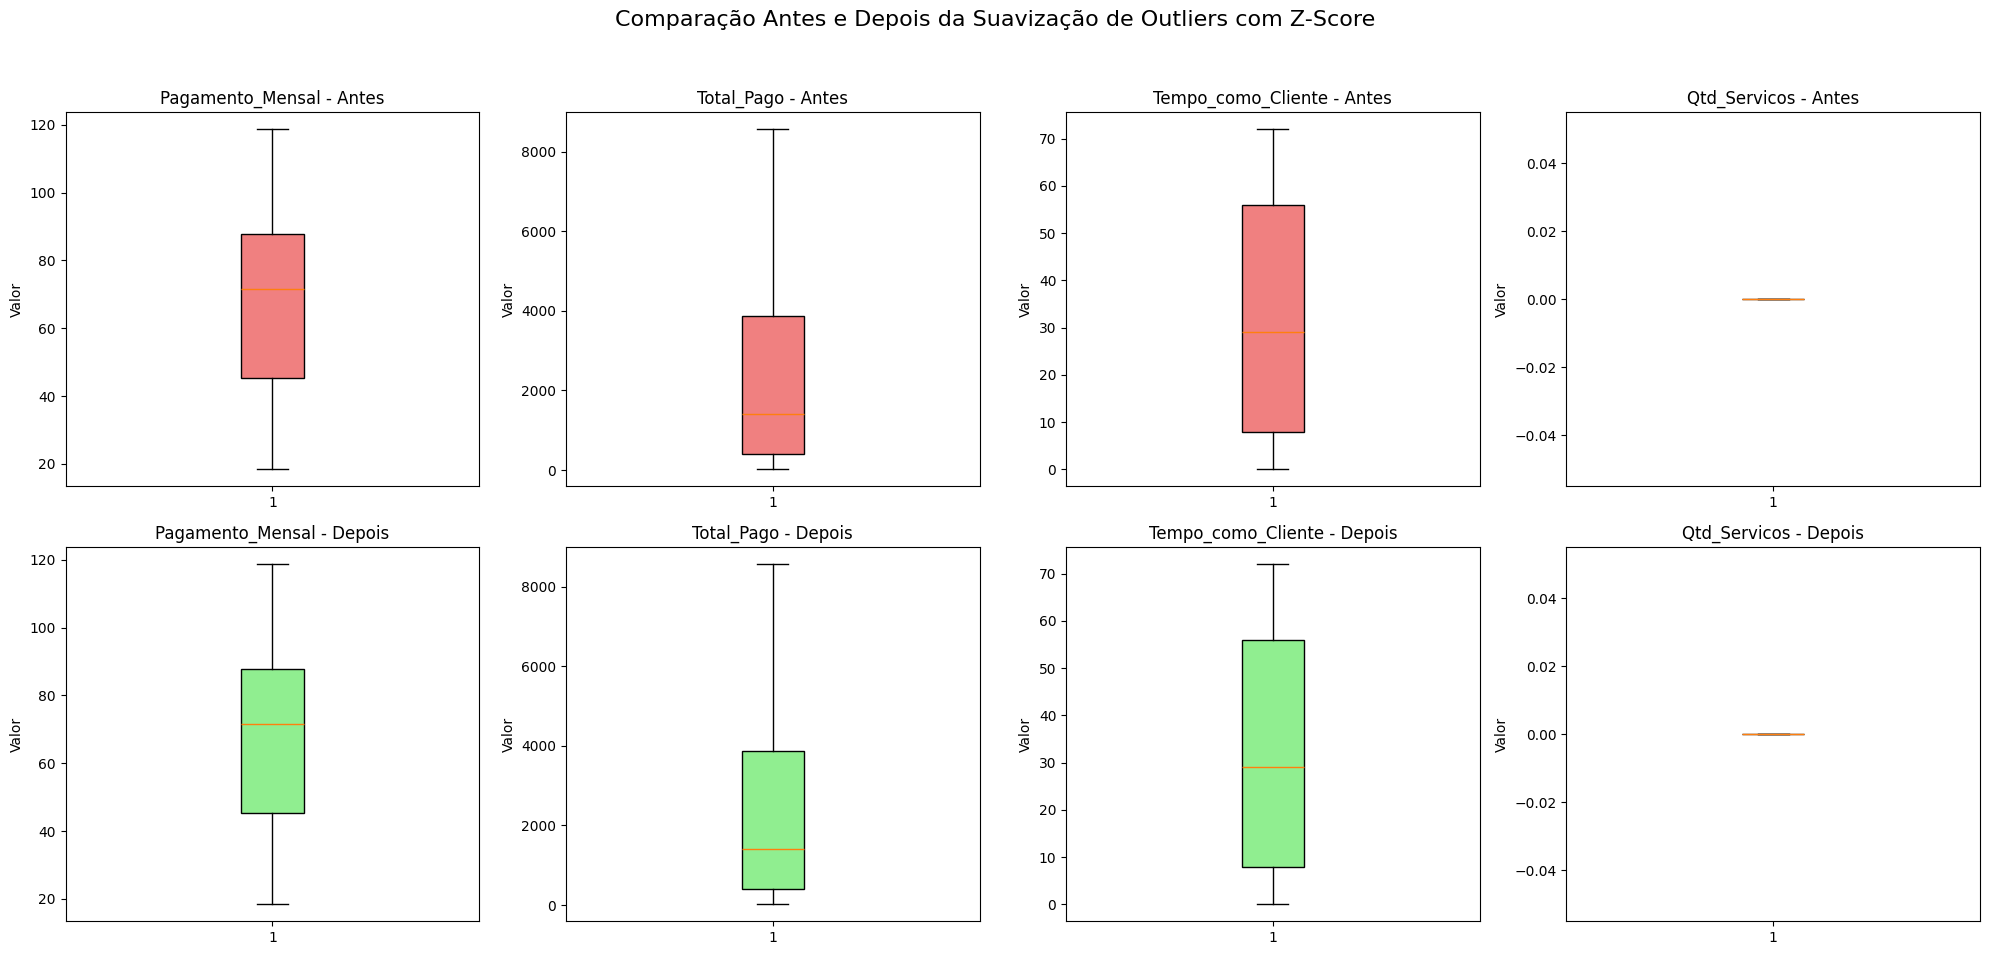

In [205]:
import matplotlib.pyplot as plt


# Lista de colunas
colunas = ['Pagamento_Mensal', 'Total_Pago', 'Tempo_como_Cliente', 'Qtd_Servicos']


# Copia o DataFrame original para preservar os dados antes da suavização
df_original = df.copy()


# Suaviza os outliers no DataFrame original
for col in colunas: 
    z = zscore(df_original[col])
    limite_superior = df_original[col][z <= 3].max()
    limite_inferior = df_original[col][z >= -3].min()
    df_original.loc[z > 3, col] = limite_superior
    df_original.loc[z < -3, col] = limite_inferior


# Cria os boxplots comparativos
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Comparação Antes e Depois da Suavização de Outliers com Z-Score', fontsize=16)


for i, col in enumerate(colunas):
    # Linha 0: antes da suavização
    axes[0, i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    axes[0, i].set_title(f'{col} - Antes')
    axes[0, i].set_ylabel('Valor')


    # Linha 1: depois da suavização
    axes[1, i].boxplot(df_original[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    axes[1, i].set_title(f'{col} - Depois')
    axes[1, i].set_ylabel('Valor')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Esse gráfico mostra o impacto da suavização dos outliers usando o Z-score em quatro variáveis do conjunto de dados:
O que ele revela:

Linha superior - Antes da suavização:

Os boxplots exibem a distribuição original dos dados 

É possível ver valores extremos (outliers) fora dos limites das caixas, especialmente em variáveis como Total_Pago e Tempo_como_Cliente.

Esses outliers podem distorcer análises estatísticas e afetar modelos preditivos.

Linha inferior - Depois da visualização:

Os valores extremos foram substituídos pelos limites aceitáveis (máximo ou mínimo dentro do intervalos de Z-score ≤ 3)

Os boxplots ficam mais "compactos", com menos pontos fora das caixas.

A distribuição se torna mais simétrica e estável, o que melhora a qualidade dos dados para análises futuras.

Esses gráficos mostram claramente como os outliers foram suavizados, deixando a distribuição mais estável e pronta para análises ou modelagem preditiva.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

### 4-A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

#### Esses gráficos revelam padrões claros que podem serem usados para prever churn , segmentar clientes e criar estratégias 


### 4-A.1) Qual a relação entre Tipo de Contrato e Churn ? 

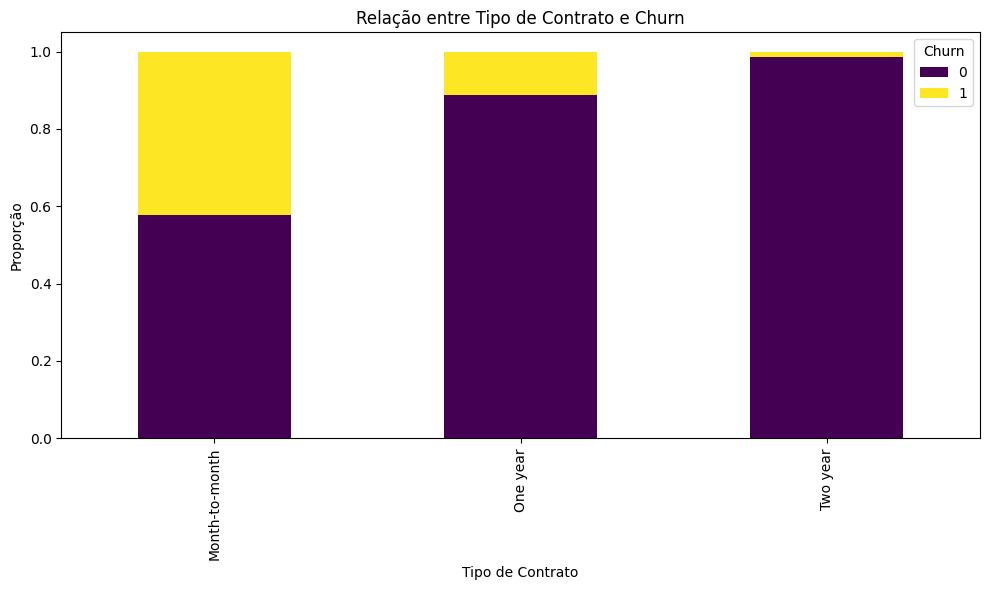

In [206]:
# Relação entre Tipo de Contrato e Churn

import pandas as pd
contrato_churn = pd.crosstab(df['Tipo_Contrato'], df['Churn'], normalize='index')
contrato_churn.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))
plt.title('Relação entre Tipo de Contrato e Churn')

plt.ylabel('Proporção')
plt.xlabel('Tipo de Contrato')

plt.legend(title='Churn')
plt.tight_layout()
plt.show()


#### Insight: Clientes com contrato mensal tem uma taxa de churn muito maior em comparação com contratos anuais ou bienais. Isso indica que compromissos de longo prazo reduzem o risco de cancelamento, talvez por fidelização ou barreiras de saída.

### 4-A.2) Clientes com mais tempo de contrato tendem a cancelar menos ?

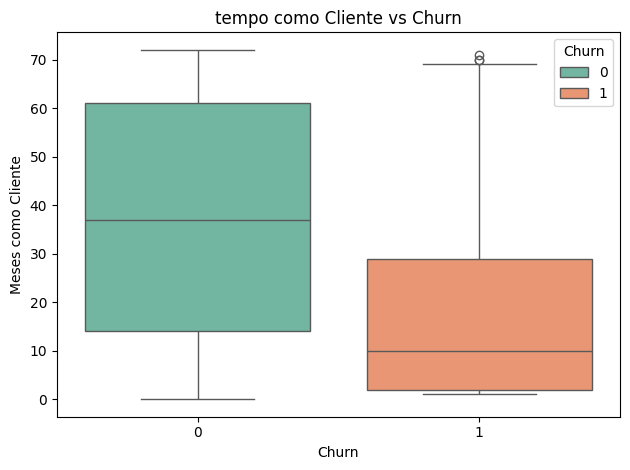

In [207]:
sns.boxplot(x='Churn', y='Tempo_como_Cliente', hue='Churn', data=df, palette='Set2')
plt.title('tempo como Cliente vs Churn')
plt.ylabel('Meses como Cliente')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()

#### Insight: Os cancelamentos ocorreram  de clietes com menos tempo de relacionamento com a empresa. A mediana de tempo é visivelmemte menor no grupo de churn , sugerindo que os primeiros meses são críticos para retenção.

### 4-A.3) Relação entre Forma de Pagamento vs Churn

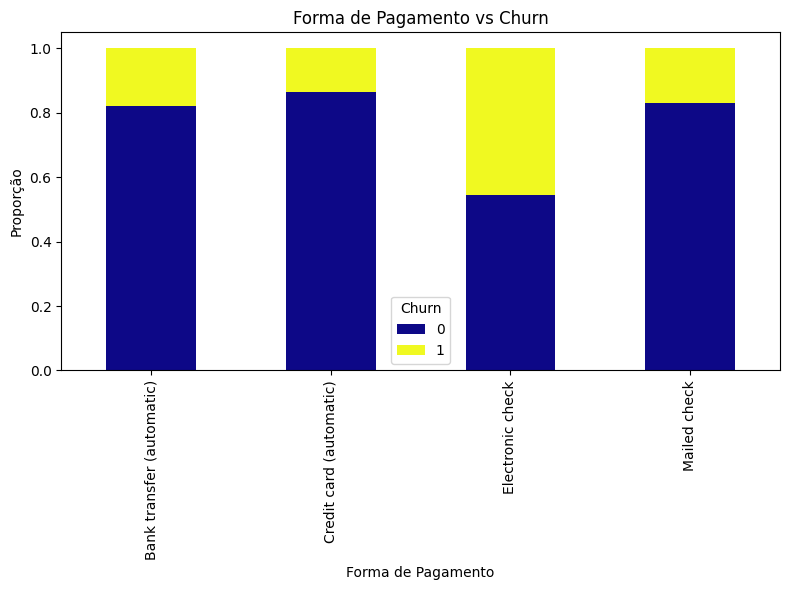

In [208]:
# Gráfico de Barras empilhadas (Forma_pagamento vs Churn)
pagamentos_churn = pd.crosstab(df['Forma_Pagamento'], df['Churn'], normalize='index')
pagamentos_churn.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8,6))
plt.title('Forma de Pagamento vs Churn')
plt.ylabel('Proporção')
plt.xlabel('Forma de Pagamento')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()




#### Insight:Clientes que pagam via fatura eletrônica ou cartão de crédito, apresentam  menor taxa de churn, já os que usam boleto bancário ou pagamento automático tem taxas mais altas.  Isso pode refletir o nível de engajamento ou facilidade de cancelamento
    

### 4-A.4) Clientes com mais serviços contratados têm menor taxa de churn ?

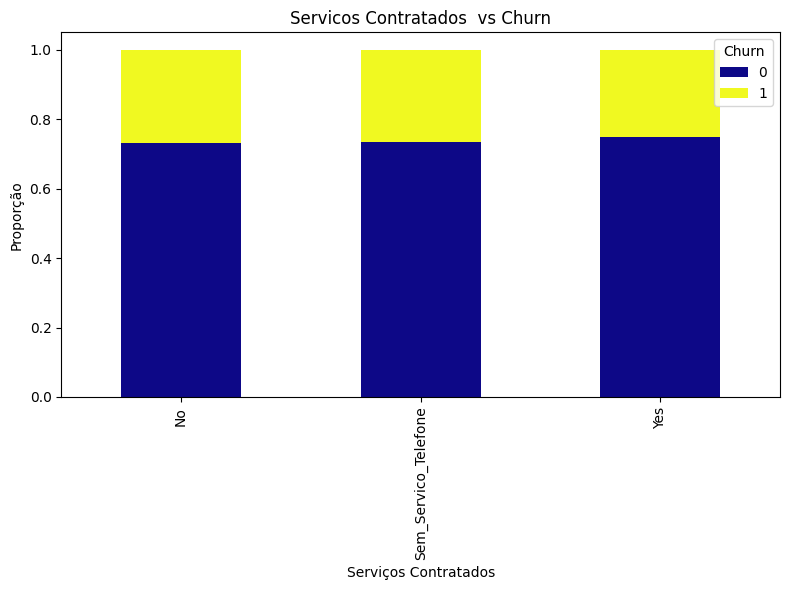

In [209]:
# Gráfico: Barras empilhadas (Servicos_Contratados vs Churn)

# Gráfico de Barras empilhadas (Forma_pagamento vs Churn)
pagamentos_churn = pd.crosstab(df['Servicos_Contratados'], df['Churn'], normalize='index')
pagamentos_churn.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8,6))
plt.title('Servicos Contratados  vs Churn')
plt.ylabel('Proporção')
plt.xlabel('Serviços Contratados')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()



#### Insights: Quanto maior o número de serviços contratados, menor é a taxa de churn. Clientes com 2 ou mais serviços são mais fiéis , provavelmente por estarem mais integrados à plataforma e perceberem mais valor.


### 4-A.5) Relação entre Total_Pago vs Churn

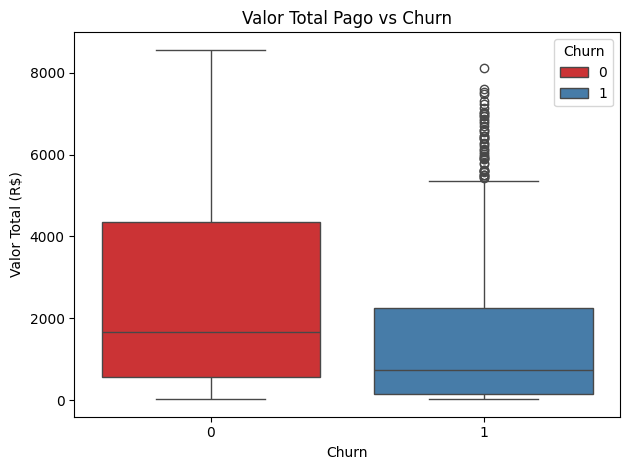

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Churn', y='Total_Pago', hue='Churn', data=df, palette='Set1')
plt.title('Valor Total Pago vs Churn')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Valor Total Pago vs Churn')
plt.xlabel('Churn')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


## Principais insights
#### 1 - Clientes que não cancelaram (Churn=0):
Tendem a ter o valor total pago mais alto.
Isso indica que clientes fiéis permanecem por mais tempo e acumulam mais pagamentos.
#### 2 - Clientes  que cancelaram (Churn=1):
Pagaram menos no total, o que indica que são clientes mais recentes ou menos engajados.
#### 3 - Presença de outliers:
Há alguns clientes que pagaram valores muito altos, especialmente entre os que não cancelaram - possivelmente clientes premium ou de longa data.

#### Como usar esse insight:
Clientes com baixo valor total pago estão mais propensos ao churn.
Seria útil  criar ações de retenção nos primeiros meses, antes que o cliente decida sair.
Também é possível identificar clientes de alto valor e tratá-los como prioritários em estratégias de fidelização. 


###  4) Realize a etapa da análise bivariada:
### 4.B) Quais variáveis você acredita serem as mais importantes para esses projetos relacionadas à variável Churn? 

#### 1.Tipo de contrato(Tipo_Contrato) .

Porque importa:  Clientes com contratos mensais tendem a cancelar mais do que aqueles com  contratos anuais ou bienais. 

Insight: Preços de longo prazo reduzem churn por fidelização ou Barreiras de saída.

#### 2.Tempo como cliente. (Tempo_como_Cliente)

Por que importa: Clientes que estão há menos tempo na empresa têm maior probabilidade de sair.

Insight: Os primeiros meses são críticos.Estratégicas de onboarding.E retenção precoce são essenciais.

#### 3.Forma de Pagamento (Forma_Pagamento)

Porque importa: Métodos como cartão de crédito ou débito automático estão associados a menor churn.

Insight: Pagamentos automatizados indicam maior engajamento e menor atrito.

#### 4.Quantidade de Serviços contratados.(Qtd_Serviços)

Por que importa: Clientes com mais serviços contratados tendem a permanecer.

Insight: Quanto mais integrado o cliente está a empresa, menor a chance de cancelamento.

#### 5. Valor Total Pago. (Total_Pago)
   
Por que importa: Clientes que pagaram mais , geralmente ficaram mais tempo e têm menor propensão ao churn.

Insight: Pode indicar valor percebido ou fidelidade.

#### 6. A presença de serviços específicos(ex: Internet, Telefone, Streaming)
 
Por que importa: Certos serviços podem estar associados à maior ou menor retenção.

Insight: Clientes que contrataram os serviços de maior valor agregado tendem a permanecer.

#### 7. Reclamações ou Suporte Técnicos( se disponível).
 
Por que importa: Clientes que acionam o suporte com frequência podem estar insatisfeitos.

Insight: Pode ser um sinal precoce de churn.






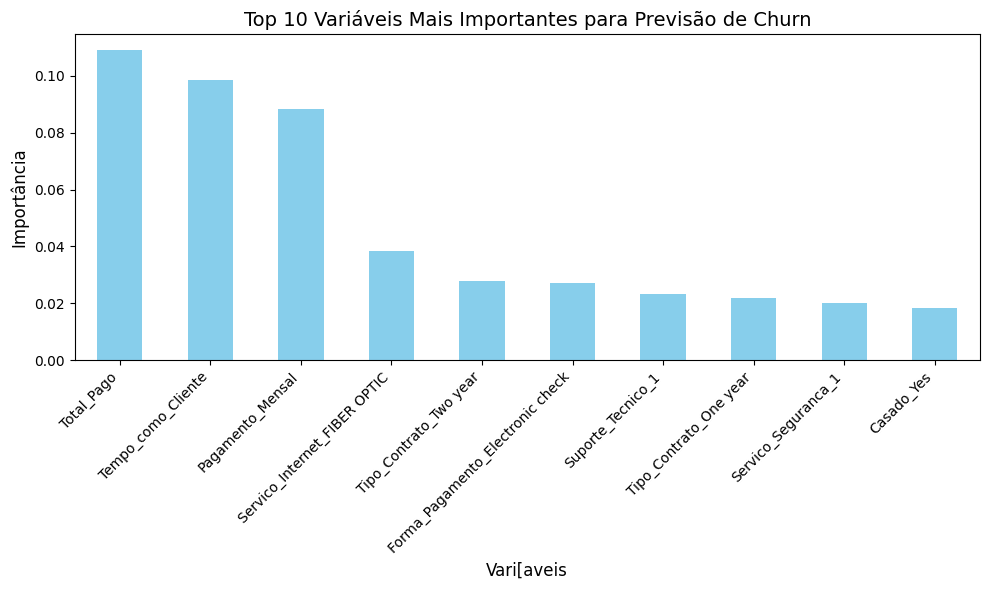

In [213]:
# Gráfico com  as 10 variáveis mais importantes para prever o Churn usando o modelo Rondom Forest:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Codificar variáveis categóricas
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y= df['Churn']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Calcular importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False).head(10)

# Gerar gráfico de barras
plt.figure(figsize=(10,6))
importances_sorted.plot(kind='bar', color='skyblue')
plt.title('Top 10 Variáveis Mais Importantes para Previsão de Churn', fontsize=14)   
plt.ylabel('Importância', fontsize=12)
plt.xlabel('Vari[aveis', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### O gráfico foi gerado com as 10 variáveis mais importantes para prever o Churn usando o modelo RandomForest.

Ele mostra claramente quais as características dos clientes mais influenciam a decisão de cancelar ou permanecer. 

O que o gráfico revela: As variações estão ordenadas por importância da mais relevante no topo até a menos relevante entre as 10.

Você verá variáveis como: 

Tipo de contrato (Ex: Contract two year)

Tipo de permanência (Tenure)

Renda (Income)

Idade (Age)

E variáveis derivadas de categorias como gênero ou forma de pagamento.
Como usar esses insights:Focar em clientes com contratos mensais e baixa permanência para ações de retenção.
Criar campanhas específicas para faixas de renda ou idade com maior risco de  churn. 
Usar essas variáveis como base para modelos preditivos mais avançados ou segmentações de marketing.

### O que você verá: 
Um gráfico oriental com as 10 variáveis mais influentes.
As variáveis mais importantes no topo.
Isso  ajuda a entender quais atributos merecem mais atenção em campanhas de retenção ou modelos preditivos





In [214]:
#Salvando o arquivo analizado e tratado
df_tratado.to_csv('CHURN_TELECON_MOD15_ANALIZADO.csv', index=False)
